<a href="https://colab.research.google.com/github/Numanur/data-science-ml/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Learning and Neural Network**

This notebook helps to understand deep learning specially neural network. We will learn this step by step.

**What is a Neuron?**

A neuron is the fundamental building block of a neural network that receives inputs, processes them (by applying weights, adding a bias, and passing through an activation function), and produces an output.

Let’s say a neuron gets 3 inputs:

$$𝑥_1, x_2. x_3$$

And it has weights:
$$w_1, w_2, w_3$$
And a bias:
$$b$$
The neuron computes:
$$z = w_1*x_1+w_2*x_2+w_3*x_3 + b$$
Then it applies an activation function (like sigmoid, ReLU, etc.):
$$a = activation(z)$$
Here, a is the neuron's output.

**A logistic regression model is basically a one-layer neural network with one neuron.**

In [2]:
import tensorflow


In [3]:
tensorflow.__version__

'2.18.0'

#**At first, we will look a neural network for hand written digit detection**

1. Import the necessary libraries
- tensorflow as the backbone
- mnist dataset inside the tensorflow (60k training images, 10k test images)
- Sequential is a linear stack of layers to build layer-by-layer.
- Dense is used to connect each neuron to all the inputs.
- Flatten converts 2D input (28×28 image) into a 1D vector (784) so it can be fed into Dense layers.
- to_categorical converts class labels (e.g. 5) into one-hot vectors (e.g. [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).

In [4]:
import tensorflow as tf
import keras
from tensorflow.math import confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loads the dataset.

X_train, X_test: image data (shape: 28×28 grayscale images)

y_train, y_test: labels (integers from 0 to 9)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

In [7]:
X_train.shape

(60000, 28, 28)

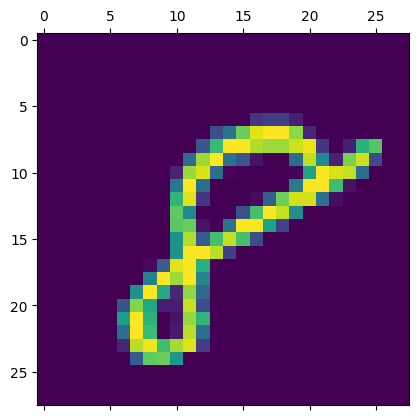

In [8]:
plt.matshow(X_train[59999])

In [9]:
y_train[59999]

np.uint8(8)

Normalize from int to float for efficiency

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

One-hot encodes the labels to make them compatible with the neural network output.
For example, label 3 becomes [0,0,0,1,0,0,0,0,0,0].

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**We will use only two layers(input and output) layer. There will be no hidden layer.**
Also out activation function is **Sigmoid**

In [12]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(10, activation='sigmoid')
])

**Now we have to compile the model**

We will use `categorical_crossentropy` as loss function because we are using for multi-class classification and one hot encoding.

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Now after compiling the model, we will have to fit with the training data**

#Change the runtime into GPU

In [14]:
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8003 - loss: 0.7564 - val_accuracy: 0.9270 - val_loss: 0.2743
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9094 - loss: 0.3229 - val_accuracy: 0.9327 - val_loss: 0.2462
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9188 - loss: 0.2915 - val_accuracy: 0.9383 - val_loss: 0.2336
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9227 - loss: 0.2804 - val_accuracy: 0.9350 - val_loss: 0.2293
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9226 - loss: 0.2741 - val_accuracy: 0.9388 - val_loss: 0.2267


In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9151 - loss: 0.3048
Test Accuracy: 92.60%


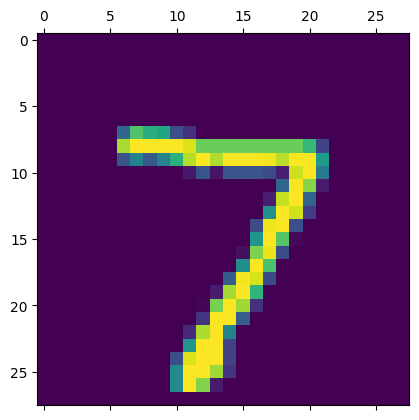

In [16]:
plt.matshow(X_test[0])

In [17]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


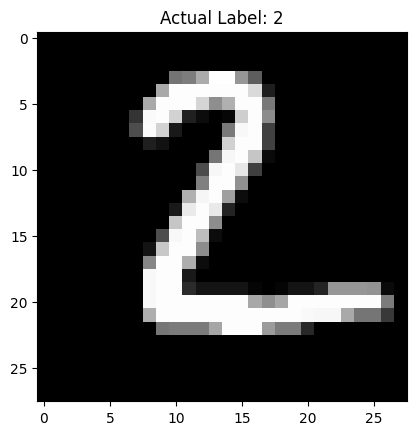

In [18]:
sample_image = X_test[1]
plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual Label: {np.argmax(y_test[1])}")
plt.show()

In [19]:
prediction = model.predict(sample_image.reshape(1, 28, 28))
print("Predicted Label:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted Label: 2


#**So our model is successfully working.**

#Let's take a look on confusion matrix and visualize it

In [20]:
cmt = confusion_matrix(labels=np.argmax(y_test, axis=1), predictions=np.argmax(y_pred, axis=1))

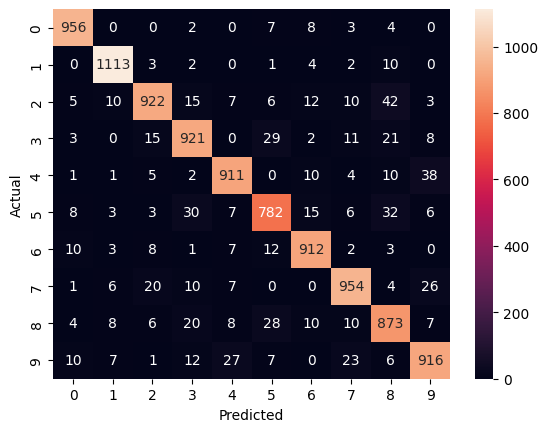

In [21]:
sns.heatmap(cmt, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**Now we will upgrade the neural network for more efficient result**

In [22]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(16, activation="relu"),
    Dense(10, activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7697 - loss: 0.7602
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9320 - loss: 0.2359
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9400 - loss: 0.2060
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9464 - loss: 0.1824
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9533 - loss: 0.1585


In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9449 - loss: 0.1988
Test Accuracy: 95.00%


#So we can see the accuracy has increased upto 94%.

In [24]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
cmt = confusion_matrix(labels=np.argmax(y_test, axis=1), predictions=np.argmax(y_pred, axis=1))

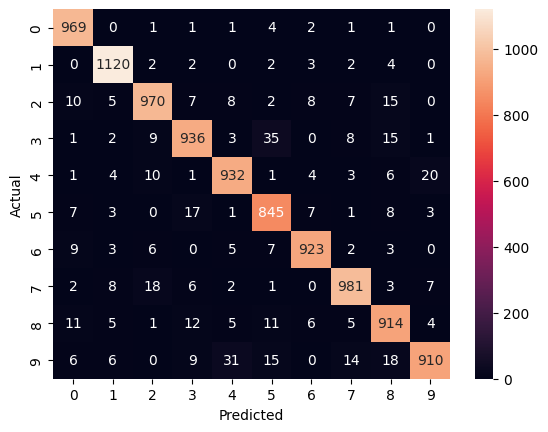

In [26]:
sns.heatmap(cmt, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#So we can see the error is less than the previous model.

#**Let's try it for more better accuracy**

In [27]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),  # Prevent overfitting

    Dense(64, activation='relu'),
    Dropout(0.3),  # Optional

    Dense(10, activation='softmax')  # Use softmax for multi-class classification
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7103 - loss: 0.8957 - val_accuracy: 0.9522 - val_loss: 0.1659
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9212 - loss: 0.2734 - val_accuracy: 0.9672 - val_loss: 0.1151
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9388 - loss: 0.2065 - val_accuracy: 0.9737 - val_loss: 0.0969
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9508 - loss: 0.1694 - val_accuracy: 0.9768 - val_loss: 0.0861
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9565 - loss: 0.1470 - val_accuracy: 0.9760 - val_loss: 0.0817
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9626 - loss: 0.1280 - val_accuracy: 0.9783 - val_loss: 0.0773
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1202 - val_accuracy: 0.9783 - val_loss: 0.0718
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9667 - loss: 0.1103 - val_accuracy: 0.

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9758 - loss: 0.0874
Test Accuracy: 97.74%


#Why this model is improved:
- Larger layers with more neurons(128 and 64 in the hidden layer)
- `Dropout(0.3)` randomly disables 30% of neurons during training to prevent overfitting
- `Softmax` in the output layer works better as it is multiclass classification.
- `epochs=10 and batch_size=128` works better during training so that model can learn well.
- `validation_split=0.1` keeps 10% of data aside for validation.

In [29]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
cmt = confusion_matrix(labels=np.argmax(y_test, axis=1), predictions=np.argmax(y_pred, axis=1))

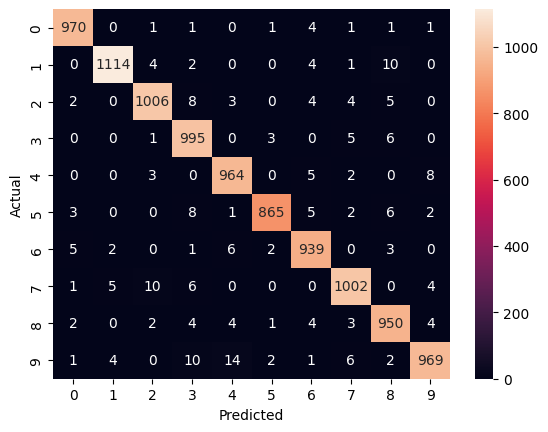

In [31]:
sns.heatmap(cmt, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**Some fundamental concepts and questions**

#**1. Activation Function**
**What is activation function?**

An activation function is a mathematical function applied to the output of a neuron in a neural network. It determines whether a neuron should "fire" or not. In simple terms:

The neuron takes inputs → does some math → applies the activation function → produces output.

Without activation function, a neural network is just like a **linear transformation**. This means it can only solve problems like straight-line classification. Activation functions let neural networks learn complex, non-linear patterns

There are various types of activation function used such as sigmoid, tanh, ReLU, Leaky ReLU, softmax.

- **Sigmoid function:**
$$sigmoid(z) = \frac{1}{1 + e^{-z}}$$
 - good for binary classification
 - output between 0 and 1.
 - Have some problems like vanishing gradient, not zero centered.

- **tanh function**
$$tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$
 - Outputs values between -1 and 1
 - zero centered ; better than sigmoid
 - still suffer from vanishing gradient

- **ReLU(Rectified Logical Unit)**
$$relu(x) = max(0, x)$$
 - Fast and simple.
 - Vanishing gradient problem solved.
 - Not zero centered.
 - Dying ReLU problem; some neurons are dead for negative inputs.
 - Works well in CNN and DNN.

- **Leaky ReLU**
$$
f(x) =
\begin{cases}
\alpha x, & \text{if } x < 0 \\
x, & \text{otherwise}
\end{cases}
$$
 - Solved dying ReLU problem.
 - The value of alpha needs to be tuned (e.g.,0.01)

- **Softmax**
$$\sigma(z_i)= \frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}}$$
  - converts a vector of raw scores (logits) from the output layer into probabilities.
  - Only for multi-class output layer
  - `loss="categorical_crossentropy"`if the final output layer uses softmax.
  

**Hidden layers' activation functions do not affect the loss function. It only depends on the final layer's activation function.**

#**2. Loss or Cost function?**
**What is a loss/cost function?**
- A loss function is a mathematical formula that tells the model how wrong its predictions are compared to the actual labels.
It quantifies the error between the predicted output and the true output.

There are multiple cost functions we can see.

- Mean absolute error:
$$MAE = \frac{1}{n}\sum_{i=1}^{n}abs(y_i - \hat{y_i})$$
 - Used in Regression problem (House price, temperature prediction etc.)
 - better handle outliers than the MSE.

- Mean Squared Error:
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$
 - Also in regression problem.

- Binary Crossentropy ( log loss):
$$Loss = - \frac{1}{n} \sum_{i=1}^{n}[y_i \log(\hat{y_i}) + (1-y_i) \log(1 - \hat{y_i})]$$
 - Used for binary classification (e.g., spam vs. not spam, fire vs. no fire)
 - $y_i \in (0, 1)$
 - Output layer should use **sigmoid**.

- Categorical Crossentropy:
$$Loss =-\sum_{i=1}^{n}\sum_{j=1}^{C}y_{ij} \log(\hat{y_{ij} })$$
 - Here C = number of classes in the classification task.
 - Used in Multi-Class Classification (one-hot labels)
 - $y_{ij} = 1$ if class j is correct, else 0
 - Used when labels are **one hot encoded ([0, 0, 1, 0, 0, 0])**
 - Use **softmax** in the final layer.

- Sparse Categorical Crossentropy: similar to categorical crossentropy
 - Used when labels are integers such as 3.


#**What is One Hot Encoding?**
One-hot encoding is a method of representing categorical labels (like class names) as binary vectors, where:
- One value is set to 1 (the "hot" one)
- All others are set to 0

Suppose our label is 3 (i.e., the image contains the digit 3).
One-hot encoded vector would look like:
$$[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]$$
 - Length of vector = number of classes = 10
 - The index 3 is marked as 1 → all others are 0.

Neural networks output probability distributions over classes.
$$[0.02, 0.01, 0.03, 0.85, 0.04, 0.01, 0.01, 0.01, 0.01, 0.01]$$
We use one-hot encoded labels to compute the loss (like categorical crossentropy) between the predicted probability and the actual truth vector.


#**What is epochs and batch_size?**
`epoch`: An epoch is one full pass through the entire training dataset by the model.

`batch_size`: batch_size is used to split the dataset into smaller unit so that the model can learn well. After one batch size sample given to the model, model will update its weight and then it will go for next batch.

By doing this, the model will complete each epochs through multiple batches.

**The first `Dense` layer should contain the neuron number as same as the batch_size.**

#**Implement a neural network to a small dataset**

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/insurance_data_2.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [34]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
X = df.drop("bought_insurance", axis=1)
y = df["bought_insurance"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled["age"] = X_train_scaled["age"] / 100
X_test_scaled["age"] = X_test_scaled["age"] / 100
X_train_scaled

,age,affordibility
24,0.50,1
13,0.29,0
20,0.21,1
25,0.54,1
16,0.25,0
1,0.25,0
10,0.18,1
27,0.46,1
26,0.23,1
8,0.62,1


In [37]:
from keras.initializers import Zeros, Ones

In [38]:
model = Sequential([
    Input(shape=(2,)),
    Dense(1,activation = 'sigmoid',
          kernel_initializer=Ones(),
          bias_initializer=Zeros()),
])
model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_scaled, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8636 - loss: 0.5450
Epoch 2502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8636 - loss: 0.5450
Epoch 2503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8636 - loss: 0.5449
Epoch 2504/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8636 - loss: 0.5449
Epoch 2505/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8636 - loss: 0.5448
Epoch 2506/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8636 - loss: 0.5448
Epoch 2507/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8636 - loss: 0.5447
Epoch 2508/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8636 - loss: 0.5447
Epoch 2509/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8636 - loss: 0.5446
Epoch 2510/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8636 - loss: 0.5446
Epoch 2511/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8636 - loss: 0.

In [47]:
test_loss, test_accuracy=model.evaluate(X_test_scaled, y_test)
print(f"The accuracy is : {test_accuracy*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.4539
The accuracy is : 100.00%


#**So our neural network is doing very well on this small dataset**